In [1]:
# Dataset: Housing Prices Dataset
# https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [2]:
import torch
from torch import nn

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 200)

In [3]:
df = pd.read_csv("./data/Housing.csv")

In [4]:
df.shape

(545, 13)

In [5]:
# display(data)
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
24,8575000,8800,3,2,2,yes,no,no,no,yes,2,no,furnished
108,6107500,3240,4,1,3,yes,no,no,no,no,1,no,semi-furnished
133,5810000,4800,3,1,3,yes,no,no,no,yes,0,no,unfurnished
280,4270000,6360,2,1,2,yes,no,no,no,no,0,no,unfurnished
362,3710000,4050,2,1,1,yes,no,no,no,no,0,no,furnished


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [10]:
# df.isnull().sum()
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [12]:
num_cols = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        num_cols.append(col)

In [13]:
num_cols

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [14]:
def display_outliers(cols=None):
    for col in cols:
        sns.boxplot(data=df, x=col)
        plt.show()

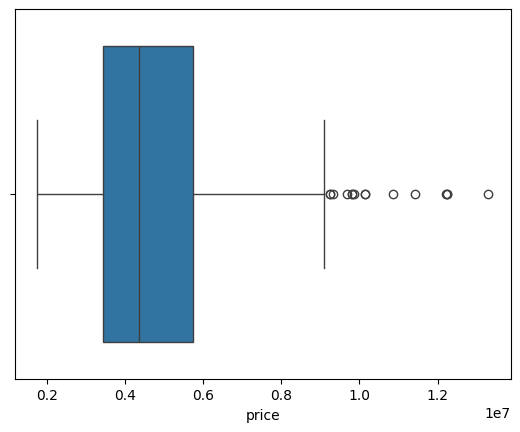

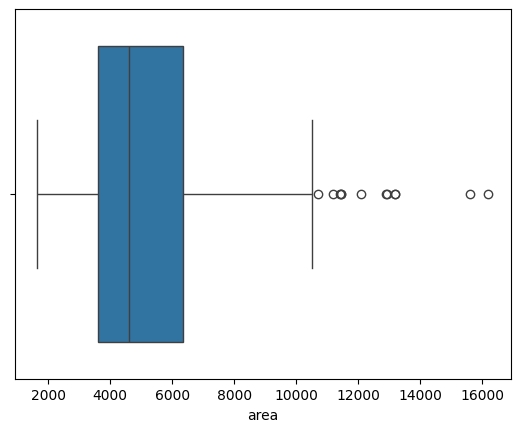

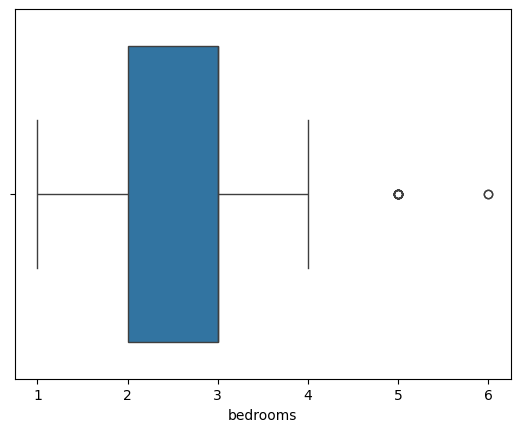

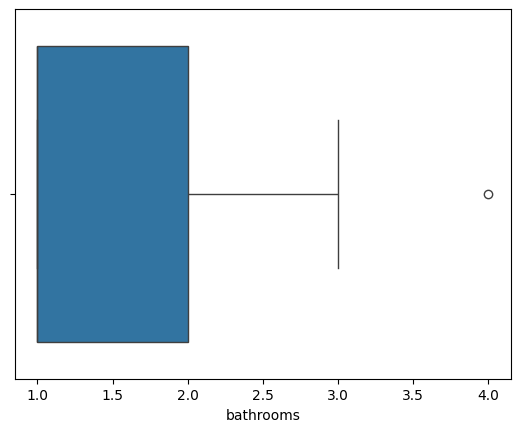

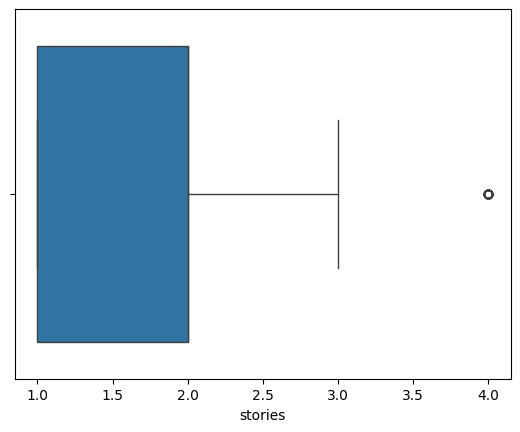

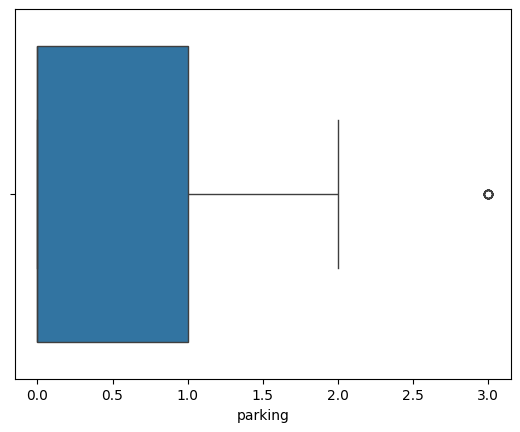

In [15]:
display_outliers(num_cols)

In [16]:
def remove_outliers(cols=None):
    for col in cols:
        mean_meu = np.mean(df[col])
        std_dev = np.std(df[col])
        for x in df[col]:
            z_score = (x - mean_meu) / std_dev
            if z_score < -2 or z_score > 2:
                df.drop(df[df[col] == x].index, inplace=True)

In [17]:
remove_outliers(num_cols)

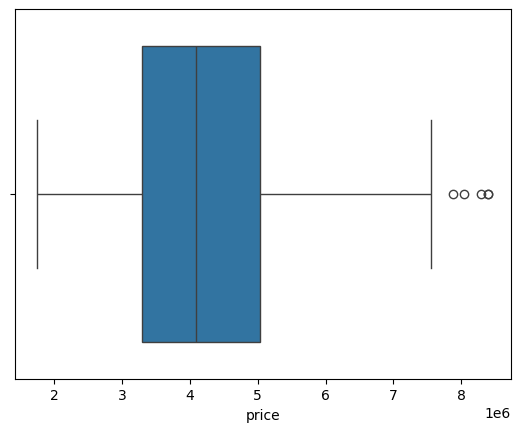

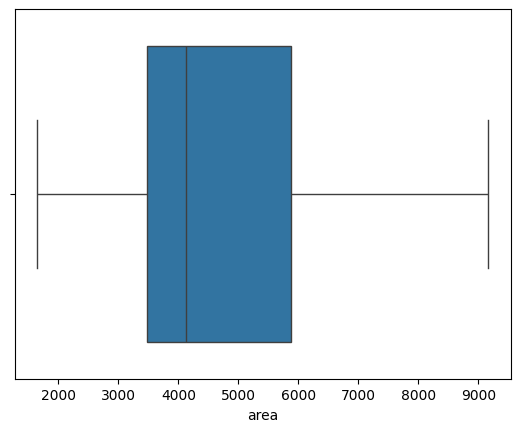

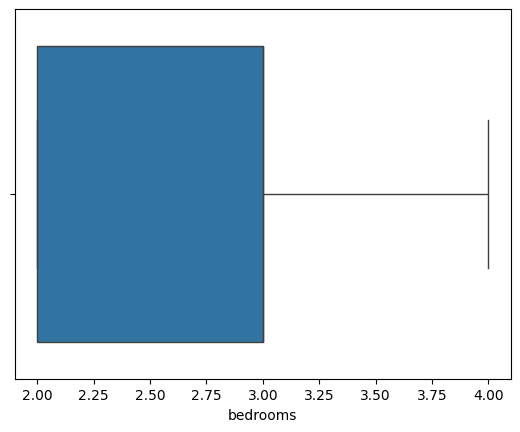

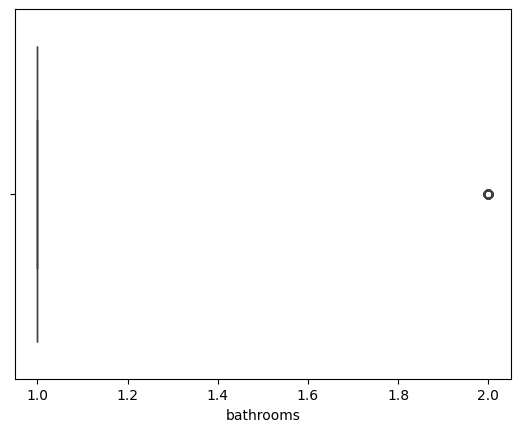

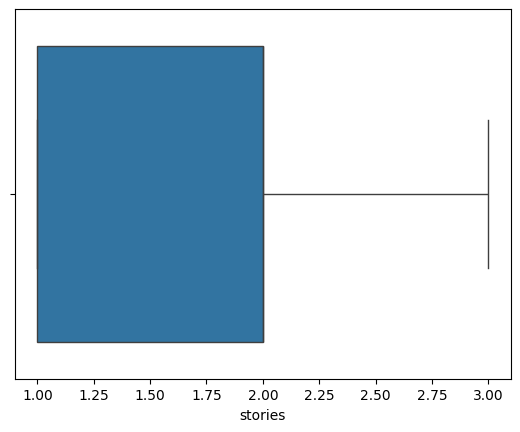

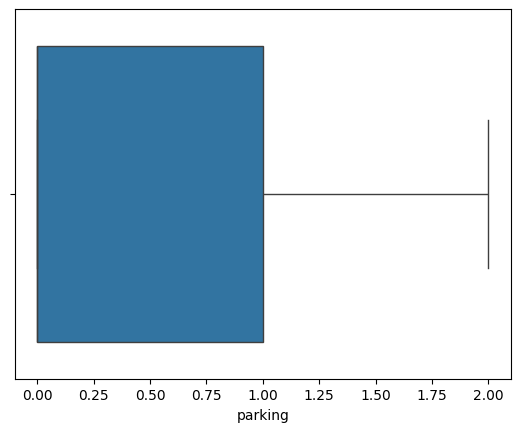

In [18]:
display_outliers(num_cols)

In [19]:
df_corr = df[num_cols].corr()

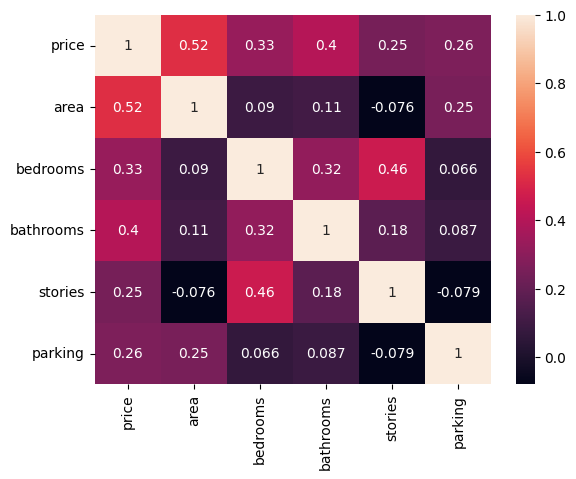

In [20]:
sns.heatmap(df_corr, annot=True)
plt.show()

In [21]:
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col, dtype=int)], axis=1)
        df.drop(labels=col, axis=1, inplace=True)

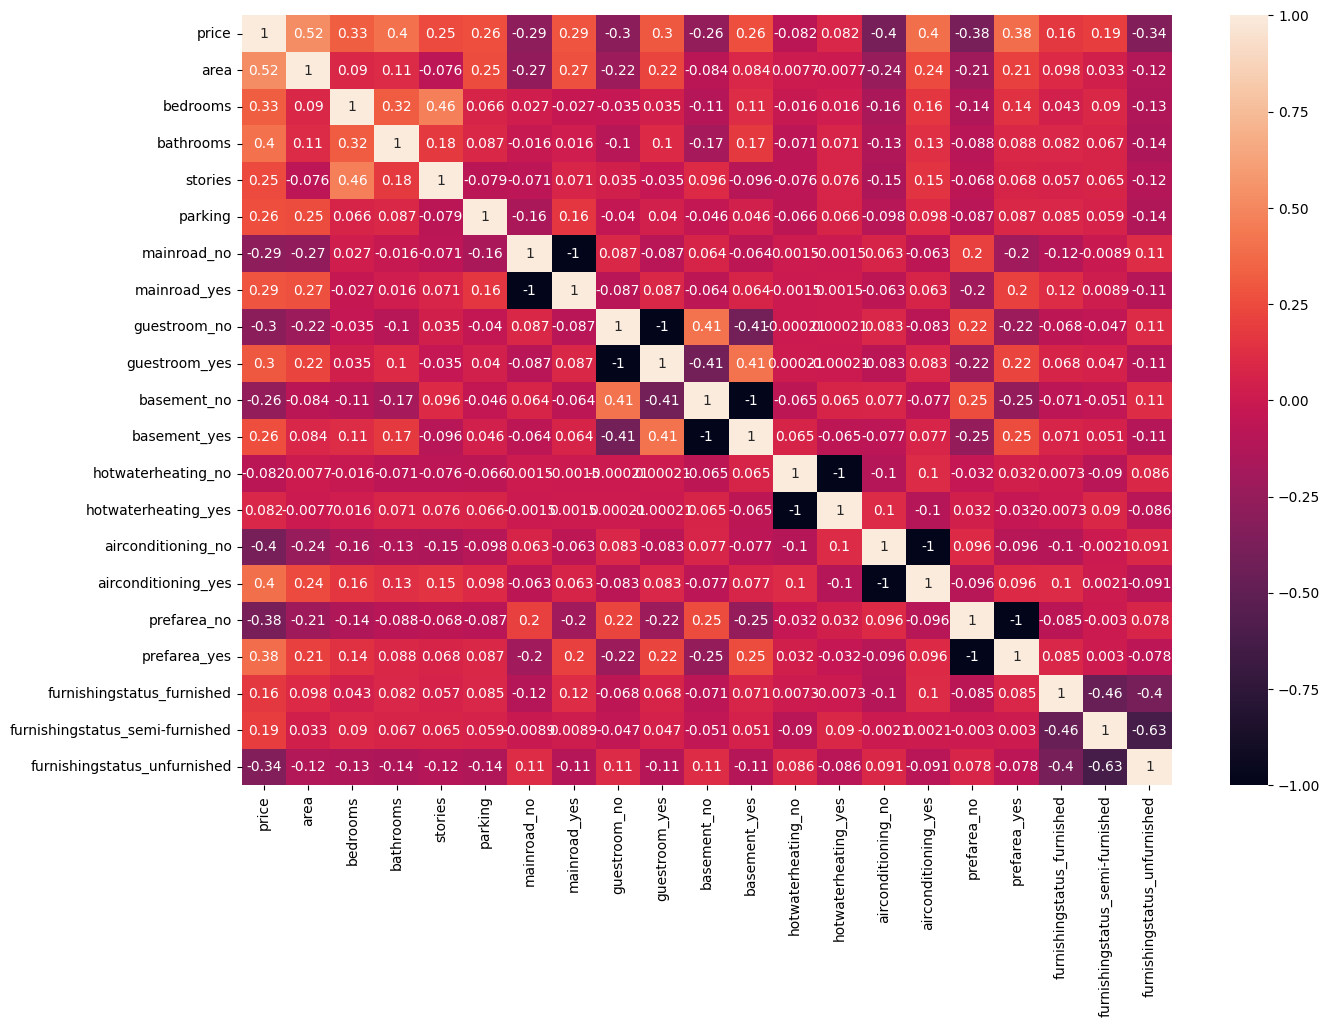

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[df.columns].corr(), annot=True)
plt.show()

In [23]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
27,8400000,8875,3,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0
29,8400000,5500,4,2,2,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0
32,8295000,4880,4,2,2,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
36,8043000,7482,3,2,3,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0
40,7875000,6550,3,1,2,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0


In [24]:
df.shape

(436, 21)

In [25]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [26]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.523800,0.327257,0.402335,0.248932,0.262588,-0.288531,0.288531,-0.299132,0.299132,-0.263570,0.263570,-0.082247,0.082247,-0.397295,0.397295,-0.383466,0.383466,0.164555,0.188305,-0.338932
area,0.523800,1.000000,0.089781,0.107062,-0.075975,0.252931,-0.266018,0.266018,-0.222132,0.222132,-0.084210,0.084210,0.007714,-0.007714,-0.242539,0.242539,-0.208379,0.208379,0.098333,0.033105,-0.120289
bedrooms,0.327257,0.089781,1.000000,0.315542,0.462967,0.065535,0.026754,-0.026754,-0.035172,0.035172,-0.110294,0.110294,-0.016050,0.016050,-0.159040,0.159040,-0.135434,0.135434,0.043182,0.089592,-0.130549
bathrooms,0.402335,0.107062,0.315542,1.000000,0.177074,0.086780,-0.016137,0.016137,-0.099872,0.099872,-0.174995,0.174995,-0.071353,0.071353,-0.128942,0.128942,-0.087740,0.087740,0.081847,0.067185,-0.141163
stories,0.248932,-0.075975,0.462967,0.177074,1.000000,-0.079190,-0.070877,0.070877,0.035418,-0.035418,0.095519,-0.095519,-0.075845,0.075845,-0.148256,0.148256,-0.067883,0.067883,0.056685,0.064893,-0.116781
parking,0.262588,0.252931,0.065535,0.086780,-0.079190,1.000000,-0.161259,0.161259,-0.040031,0.040031,-0.045994,0.045994,-0.066230,0.066230,-0.098464,0.098464,-0.086593,0.086593,0.085199,0.059249,-0.135876
mainroad_no,-0.288531,-0.266018,0.026754,-0.016137,-0.070877,-0.161259,1.000000,-1.000000,0.086922,-0.086922,0.063763,-0.063763,0.001544,-0.001544,0.063278,-0.063278,0.202229,-0.202229,-0.115751,-0.008872,0.110429
mainroad_yes,0.288531,0.266018,-0.026754,0.016137,0.070877,0.161259,-1.000000,1.000000,-0.086922,0.086922,-0.063763,0.063763,-0.001544,0.001544,-0.063278,0.063278,-0.202229,0.202229,0.115751,0.008872,-0.110429
guestroom_no,-0.299132,-0.222132,-0.035172,-0.099872,0.035418,-0.040031,0.086922,-0.086922,1.000000,-1.000000,0.413151,-0.413151,-0.000212,0.000212,0.082716,-0.082716,0.224559,-0.224559,-0.067606,-0.047330,0.108145
guestroom_yes,0.299132,0.222132,0.035172,0.099872,-0.035418,0.040031,-0.086922,0.086922,-1.000000,1.000000,-0.413151,0.413151,0.000212,-0.000212,-0.082716,0.082716,-0.224559,0.224559,0.067606,0.047330,-0.108145


In [27]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [28]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 891240181521.3188
Mean Absolute Error: 670819.7812998142
R-squared Score: 0.5750718510087847


In [32]:
device = "cuda" if torch.cuda.is_available else "cpu"

In [33]:
X = torch.tensor(X, dtype=torch.float32, device=device)
y = torch.tensor(y, dtype=torch.float32, device=device)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [35]:
class HousePricePredictor(nn.Module):
    def __init__(self, input_features, hidden_units, output_features):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layers(x)

house_price_predictor = HousePricePredictor(input_features=X.shape[1], hidden_units=20, output_features=1).to(device)

In [36]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(house_price_predictor.parameters(), lr=0.01)

In [37]:
from torchmetrics.regression import R2Score

r2score = R2Score().to(device)
epochs = 10000

for epoch in range(epochs):
    # ----- TRAINING -----
    house_price_predictor.train()
    pred = house_price_predictor(X_train).flatten()
    loss = loss_fn(pred, y_train)
    r_loss = torch.sqrt(loss)
    r2_train = r2score(y_train, pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # ----- TESTING -----
    if epoch % 1000 == 0:
        house_price_predictor.eval()
        with torch.inference_mode():
            test_pred = house_price_predictor(X_test).flatten()
            test_loss = loss_fn(test_pred, y_test)
            r_test_loss = torch.sqrt(test_loss)
            r2_test = r2score(y_test, test_pred)
        print(f"Epoch: {epoch} | MSE: {test_loss}, RMSE: {r_test_loss}, R2Score: {r2_test} |")

Epoch: 0 | MSE: 19723362238464.0, RMSE: 4441099.0, R2Score: -1.4447522659434496e+16 |
Epoch: 1000 | MSE: 4335497379840.0, RMSE: 2082185.75, R2Score: -0.1284780502319336 |
Epoch: 2000 | MSE: 1214226497536.0, RMSE: 1101919.5, R2Score: 0.31763696670532227 |
Epoch: 3000 | MSE: 897671036928.0, RMSE: 947455.0625, R2Score: 0.3299219608306885 |
Epoch: 4000 | MSE: 844727320576.0, RMSE: 919090.5, R2Score: 0.3280748724937439 |
Epoch: 5000 | MSE: 841504587776.0, RMSE: 917335.5625, R2Score: 0.3078111410140991 |
Epoch: 6000 | MSE: 811646910464.0, RMSE: 900914.5, R2Score: 0.3391674757003784 |
Epoch: 7000 | MSE: 803272327168.0, RMSE: 896254.625, R2Score: 0.36535364389419556 |
Epoch: 8000 | MSE: 782461894656.0, RMSE: 884568.75, R2Score: 0.38859134912490845 |
Epoch: 9000 | MSE: 783294660608.0, RMSE: 885039.375, R2Score: 0.3912351727485657 |
